**Appendix A: Import data and packages to Python. Create subset**

In [1]:
#import needed packages
import pandas as pd
import numpy as np 
import statistics as stats
import matplotlib.pyplot as plt
from scipy import stats

foodchoice_df = pd.read_csv("food_coded.csv") #import the data from csv file
foodchoice_df = foodchoice_df.dropna(subset = ['GPA','veggies_day'])

GPA = foodchoice_df['GPA'] 
veggies_day = foodchoice_df['veggies_day']

#Convert the data into list for easier manipulation 
list_GPA = list(GPA)
list_veggies_day = list(veggies_day)

#Create list of 2 subset of GPA: Eat less veggies or eat more veggies
less_veggies = [] 
more_veggies = [] 

for i in range(len(list_veggies_day)):
    if list_veggies_day[i] <3: #GPA conressponding to those rate 1 or 2 on the likelihood of eating veggies
        less_veggies.append(GPA[i])
    if list_veggies_day[i] >3: #GPA conressponding to those rate 4 or 5 on the likelihood of eating veggies
        more_veggies.append(GPA[i])

foodchoice_df.head(10) #shows the first 10 rows of the data 

,GPA,veggies_day
0,2.25,1
1,3.80,1
2,2.20,2
3,3.87,2
4,3.20,2
5,3.70,2
6,3.10,2
7,3.40,2
8,3.50,2
9,3.92,2


**Appendix B: Descriptive statistics for the dataset**

In [2]:
#Descriptive statistics for the dataset 
#Function to calculate mean, mode, range, and standard deviation of the dataset
def mean(lst):
    total = 0 # variable to calculate the sum of all values in the list 
    for i in range(len(lst)): #repeat this loop for each value of the list 
        total += lst[i] # sum is the current sum plus the value of the list
    return round(total/len(lst),3) #mean is the total sum divided by the number of values of the list 

def my_count(lst, val): # function to count number of occurences of 1 value in a list 
    count = 0 #set initial occurence to 0
    for i in range(len(lst)): # the loop to repeat for each value of the list 
        if lst[i] == val: # to check whether the current value matches our desirable value "val"
            count += 1 #if it's true, the it is counted as 1
    return count 
                        
def mode(lst): 
    occurence = 0 # number of occurences of the mode value
    mode = 0 # mode of the input list 
    for i in range(len(lst)): 
        if my_count(lst, lst[i]) > occurence: #check whether the current value has higher number of occurences than the previous value
            mode = lst[i] #if yes, then the mode is the current value
            occurence = my_count(lst, lst[i]) #update the maximum number of occurences according to the current mode 
    if occurence == 1: #if occurence is 1, meaning that all number in the list only occurs exactly 1 and do not repeat
        return print("This list does not have a mode") #then this list does not have a mode 
    else:
        return round(mode, 3)

def find_range(lst):
    lst_range = max(lst) - min(lst) #range of a list is the difference between the maximum value and minimum value 
    return round(lst_range,3)
    
def std(lst):
    total = 0
    for i in range(len(lst)): 
        total += (lst[i]-mean(lst))**2 #find the difference between the current value and the mean of the list, then multiply it to the exponent of 2
    std = (total/len(lst))**0.5 #divide the total above with the number of items in the list and find square root of it 
    return round(std, 3)

#Build a function to calculate descriptive statistics based on Python inbuilt function
def descriptive_stats(data):
    print("Count: ", len(data))
    print("Mean: ", mean(data))
    print("Median: ", np.median(data))
    print("Mode: ", mode(data))
    print("Standard deviation: ", std(data))
    print("Range: ", find_range(data))

print("Descriptive stats for GPA")    
descriptive_stats(list_GPA)

print("\nDescriptive stats for likelihood of eating veggies")    
descriptive_stats(list_veggies_day)

print("\nDescriptive stats for GPA of students eating less veggies")
descriptive_stats(less_veggies)

print("\nDescriptive stats for GPA of students eating more veggies")
descriptive_stats(more_veggies)

Descriptive stats for GPA
Count:  121
Mean:  3.419
Median:  3.5
Mode:  3.5
Standard deviation:  0.388
Range:  1.8

Descriptive stats for likelihood of eating veggies
Count:  121
Mean:  4.025
Median:  4.0
Mode:  5
Standard deviation:  1.048
Range:  4

Descriptive stats for GPA of students eating less veggies
Count:  13
Mean:  3.295
Median:  3.4
This list does not have a mode
Mode:  None
Standard deviation:  0.534
Range:  1.72

Descriptive stats for GPA of students eating more veggies
Count:  88
Mean:  3.449
Median:  3.5
Mode:  3.5
Standard deviation:  0.358
Range:  1.6


**Appendix C: Data visualization of the dataset**

Text(0,0.5,'Count')

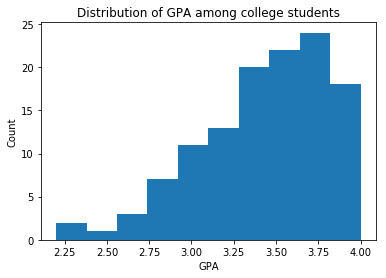

In [3]:
#Data visualization of the dataset 
plt.hist(list_GPA)
plt.title("Distribution of GPA among college students")
plt.xlabel("GPA")
plt.ylabel("Count")

Text(0,0.5,'Count')

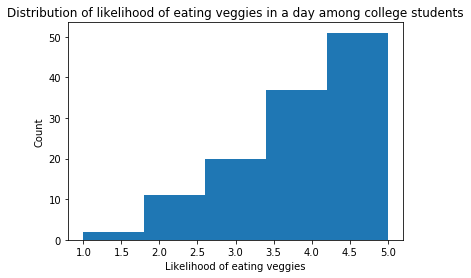

In [4]:
plt.hist(list_veggies_day, 5)
plt.title("Distribution of likelihood of eating veggies in a day among college students")
plt.xlabel("Likelihood of eating veggies")
plt.ylabel("Count")

Text(0,0.5,'Count')

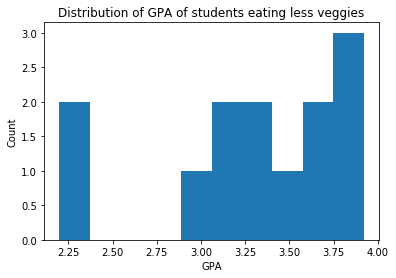

In [5]:
plt.hist(less_veggies)
plt.title("Distribution of GPA of students eating less veggies")
plt.xlabel("GPA")
plt.ylabel("Count")

Text(0,0.5,'Count')

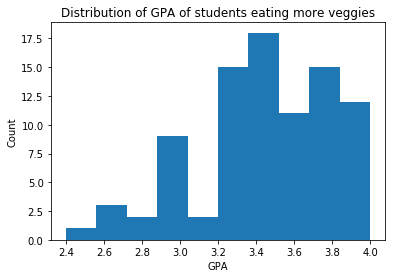

In [6]:
plt.hist(more_veggies)
plt.title("Distribution of GPA of students eating more veggies")
plt.xlabel("GPA")
plt.ylabel("Count")

**Appendix D: Constructing confidence intervals of the mean of GPA**

In [7]:
#Constructing confidence interals of the mean of GPA
#Standard error is the standard deviation divided by the square root of the sample size
standard_error = std(list_GPA)/(len(list_GPA)**0.5)

#Upper bound of the confidence interval 
#1.96 is the conressponding z-score of the 95% confidence level
upper_limit = mean(list_GPA) + 1.96*standard_error 

#lower bound of the confidence interval
lower_limit = mean(list_GPA) - 1.96*standard_error

print("The 95% confidence interval is from ", round(lower_limit, 3), " to ", round(upper_limit, 3))

The 95% confidence interval is from  3.35  to  3.488


**Appendix E: Constructing the hypothesis test on the 2 means of the subset**

In [8]:
#Constructing the hypothesis test

#Data from the less_veggies group
n1 = len(less_veggies)
std1 = std(less_veggies)
mean1 = mean(less_veggies)

#Data from the more_veggies group
n2 = len(more_veggies)
std2 = std(more_veggies)
mean2 = mean(more_veggies)

#Standard error
se = ((std1**2/n1)+(std2**2/n2))**0.5 
t_score = abs(mean1-mean2)/se

#Degree of freedom is subtracting 1 from the smaller sample size
degree_of_freedom = (min(len(less_veggies), len(more_veggies))) - 1
p_value = 2*stats.t.cdf(-t_score, degree_of_freedom)
SD_pooled = (((std1**2)*(n1-1)+(std2**2)*(n2-1))/(n1+n2-2))**0.5
effect_size = (mean2 - mean1)/SD_pooled

print("Standard error: ", round(se,3))
print("T-score: ", round(t_score, 3))
print("p-value: ", round(p_value, 3))
print("Effect size: ", round(effect_size,3))

Standard error:  0.153
T-score:  1.007
p-value:  0.334
Effect size:  0.401
